In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"file:///C:\Users\Hp\Downloads\Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df = df.drop(columns=['Person ID', 'Gender','Quality of Sleep'])


In [6]:
#physical activity level and daily steps are almost related phy. activities so im removing one of it columns
df=df.drop(columns=['Age', 'Daily Steps'])

In [7]:
df.head()

,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Software Engineer,6.1,42,6,Overweight,126/83,77,None
1,Doctor,6.2,60,8,Normal,125/80,75,None
2,Doctor,6.2,60,8,Normal,125/80,75,None
3,Sales Representative,5.9,30,8,Obese,140/90,85,Sleep Apnea
4,Sales Representative,5.9,30,8,Obese,140/90,85,Sleep Apnea


In [8]:


# Split Blood Pressure into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Categorize Blood Pressure
def categorize_bp(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80:
        return 'Normal'
    elif 120 <= row['Systolic'] < 130 and row['Diastolic'] < 80:
        return 'Elevated'
    elif 130 <= row['Systolic'] < 140 or 80 <= row['Diastolic'] < 90:
        return 'Hypertension Stage 1'
    elif 140 <= row['Systolic'] < 180 or 90 <= row['Diastolic'] < 120:
        return 'Hypertension Stage 2'
    elif row['Systolic'] >= 180 or row['Diastolic'] >= 120:
        return 'Hypertensive Crisis'
    else:
        return 'Unknown'

df['BP Category'] = df.apply(categorize_bp, axis=1)



In [9]:
df

,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP Category
0,Software Engineer,6.1,42,6,Overweight,126/83,77,None,126,83,Hypertension Stage 1
1,Doctor,6.2,60,8,Normal,125/80,75,None,125,80,Hypertension Stage 1
2,Doctor,6.2,60,8,Normal,125/80,75,None,125,80,Hypertension Stage 1
3,Sales Representative,5.9,30,8,Obese,140/90,85,Sleep Apnea,140,90,Hypertension Stage 2
4,Sales Representative,5.9,30,8,Obese,140/90,85,Sleep Apnea,140,90,Hypertension Stage 2
...,...,...,...,...,...,...,...,...,...,...,...
369,Nurse,8.1,75,3,Overweight,140/95,68,Sleep Apnea,140,95,Hypertension Stage 2
370,Nurse,8.0,75,3,Overweight,140/95,68,Sleep Apnea,140,95,Hypertension Stage 2
371,Nurse,8.1,75,3,Overweight,140/95,68,Sleep Apnea,140,95,Hypertension Stage 2
372,Nurse,8.1,75,3,Overweight,140/95,68,Sleep Apnea,140,95,Hypertension Stage 2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Occupation               374 non-null    object 
 1   Sleep Duration           374 non-null    float64
 2   Physical Activity Level  374 non-null    int64  
 3   Stress Level             374 non-null    int64  
 4   BMI Category             374 non-null    object 
 5   Blood Pressure           374 non-null    object 
 6   Heart Rate               374 non-null    int64  
 7   Sleep Disorder           374 non-null    object 
 8   Systolic                 374 non-null    int32  
 9   Diastolic                374 non-null    int32  
 10  BP Category              374 non-null    object 
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 29.3+ KB


In [11]:
df=df.drop(columns=['Blood Pressure'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Occupation               374 non-null    object 
 1   Sleep Duration           374 non-null    float64
 2   Physical Activity Level  374 non-null    int64  
 3   Stress Level             374 non-null    int64  
 4   BMI Category             374 non-null    object 
 5   Heart Rate               374 non-null    int64  
 6   Sleep Disorder           374 non-null    object 
 7   Systolic                 374 non-null    int32  
 8   Diastolic                374 non-null    int32  
 9   BP Category              374 non-null    object 
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 26.4+ KB


In [13]:
#label encode some categorical variables
#occupation,BMI category,sleepDisorder,Bpcategory
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [14]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [15]:
df['BP Category'].value_counts()

Hypertension Stage 1    261
Hypertension Stage 2     71
Normal                   41
Elevated                  1
Name: BP Category, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df['BMI Category']=le.fit_transform(df['BMI Category'])

In [19]:
# Access the mapping of labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping:")
print(label_mapping)



Label Mapping:
{'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}


In [20]:
df['Occupation'] = le.fit_transform(df['Occupation'])
# Access the mapping of labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping:")
print(label_mapping)



Label Mapping:
{'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}


In [21]:
df['BP Category']=le.fit_transform(df['BP Category'])
# Access the mapping of labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping:")
print(label_mapping)



Label Mapping:
{'Elevated': 0, 'Hypertension Stage 1': 1, 'Hypertension Stage 2': 2, 'Normal': 3}


In [22]:
df['Sleep Disorder']=le.fit_transform(df['Sleep Disorder'])
# Access the mapping of labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping:")
print(label_mapping)



Label Mapping:
{'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}


In [23]:
df

,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP Category
0,9,6.1,42,6,3,77,1,126,83,1
1,1,6.2,60,8,0,75,1,125,80,1
2,1,6.2,60,8,0,75,1,125,80,1
3,6,5.9,30,8,2,85,2,140,90,2
4,6,5.9,30,8,2,85,2,140,90,2
...,...,...,...,...,...,...,...,...,...,...
369,5,8.1,75,3,3,68,2,140,95,2
370,5,8.0,75,3,3,68,2,140,95,2
371,5,8.1,75,3,3,68,2,140,95,2
372,5,8.1,75,3,3,68,2,140,95,2


In [24]:
df.isnull().sum()

Occupation                 0
Sleep Duration             0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
BP Category                0
dtype: int64

In [25]:
df.duplicated().sum()

272

# Drop duplicated rows
df.drop_duplicates(inplace=True)


In [26]:
df

,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP Category
0,9,6.1,42,6,3,77,1,126,83,1
1,1,6.2,60,8,0,75,1,125,80,1
2,1,6.2,60,8,0,75,1,125,80,1
3,6,5.9,30,8,2,85,2,140,90,2
4,6,5.9,30,8,2,85,2,140,90,2
...,...,...,...,...,...,...,...,...,...,...
369,5,8.1,75,3,3,68,2,140,95,2
370,5,8.0,75,3,3,68,2,140,95,2
371,5,8.1,75,3,3,68,2,140,95,2
372,5,8.1,75,3,3,68,2,140,95,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Occupation               374 non-null    int32  
 1   Sleep Duration           374 non-null    float64
 2   Physical Activity Level  374 non-null    int64  
 3   Stress Level             374 non-null    int64  
 4   BMI Category             374 non-null    int32  
 5   Heart Rate               374 non-null    int64  
 6   Sleep Disorder           374 non-null    int32  
 7   Systolic                 374 non-null    int32  
 8   Diastolic                374 non-null    int32  
 9   BP Category              374 non-null    int32  
dtypes: float64(1), int32(6), int64(3)
memory usage: 20.6 KB


In [28]:
df.corr()

,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP Category
Occupation,1.000000,-0.325775,-0.103660,0.021123,0.699504,0.043928,-0.169800,0.518561,0.521835,-0.101987
Sleep Duration,-0.325775,1.000000,0.212360,-0.811023,-0.376358,-0.516455,0.177552,-0.180406,-0.166570,0.021806
Physical Activity Level,-0.103660,0.212360,1.000000,-0.034134,0.077156,0.136971,0.433214,0.265416,0.382651,0.307893
Stress Level,0.021123,-0.811023,-0.034134,1.000000,0.163895,0.670026,-0.036058,0.102818,0.091811,-0.195690
BMI Category,0.699504,-0.376358,0.077156,0.163895,1.000000,0.295585,0.016573,0.714057,0.750869,0.073695
Heart Rate,0.043928,-0.516455,0.136971,0.670026,0.295585,1.000000,0.205987,0.294143,0.271092,0.001709
Sleep Disorder,-0.169800,0.177552,0.433214,-0.036058,0.016573,0.205987,1.000000,0.241786,0.310051,0.338305
Systolic,0.518561,-0.180406,0.265416,0.102818,0.714057,0.294143,0.241786,1.000000,0.972885,-0.124105
Diastolic,0.521835,-0.166570,0.382651,0.091811,0.750869,0.271092,0.310051,0.972885,1.000000,-0.032316
BP Category,-0.101987,0.021806,0.307893,-0.195690,0.073695,0.001709,0.338305,-0.124105,-0.032316,1.000000


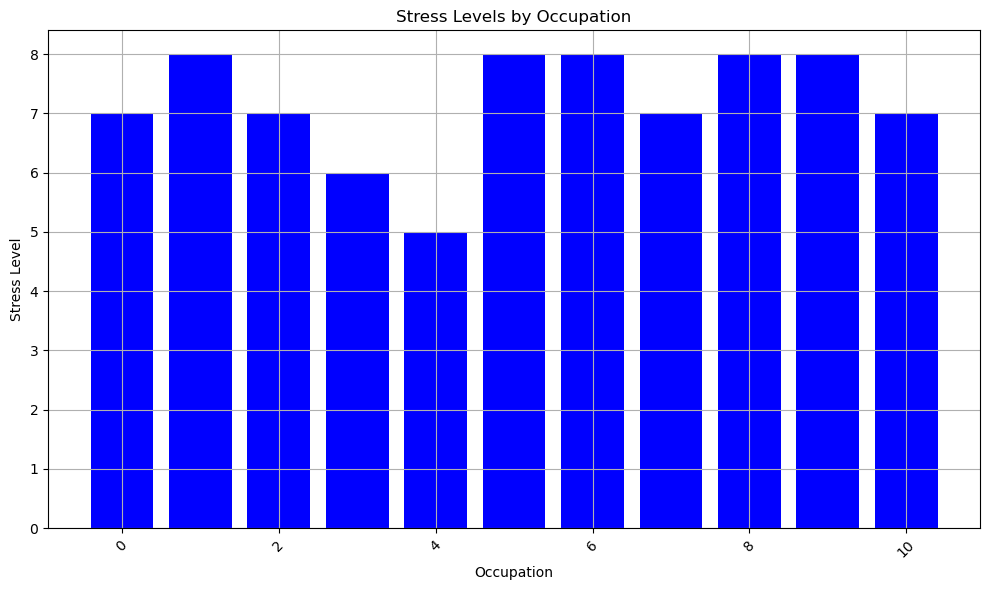

In [29]:



occupation_data = df['Occupation']
stress_level_data = df['Stress Level']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size if needed
plt.bar(occupation_data, stress_level_data, color='blue')  # Customize color if desired
plt.xlabel('Occupation')  # X-axis label
plt.ylabel('Stress Level')  # Y-axis label
plt.title('Stress Levels by Occupation')  # Plot title
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.grid(True)  # Add gridlines if desired
plt.tight_layout()  # Ensure labels fit within figure area
plt.show()  # Display the plot


Label Mapping:
{'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}.above graph suggests that manager has low stress compared to all occupations.

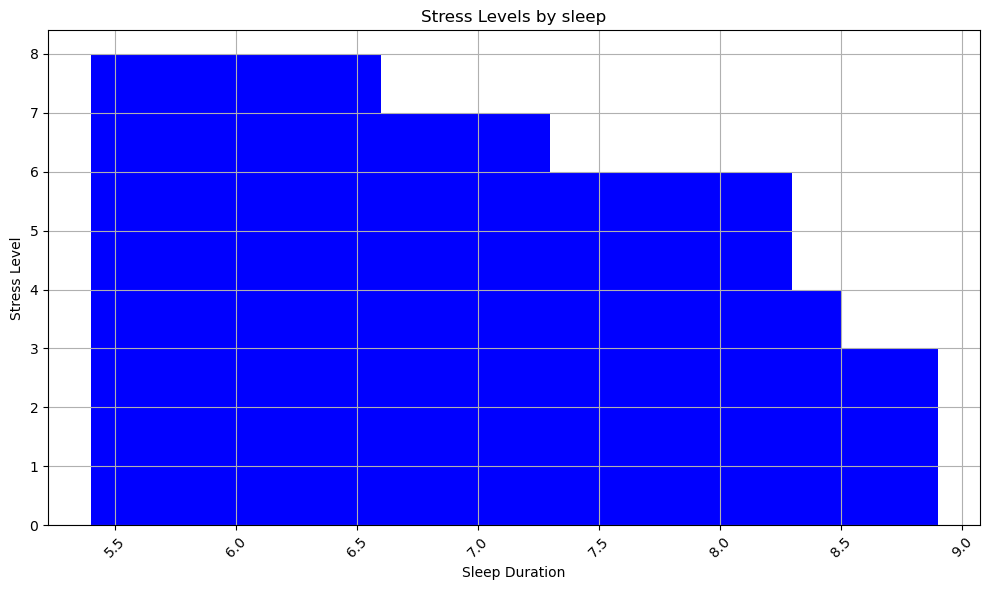

In [30]:
SleepDuration= df['Sleep Duration']
stress_level_data = df['Stress Level']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size if needed
plt.bar(SleepDuration, stress_level_data, color='blue')  # Customize color if desired
plt.xlabel('Sleep Duration')  # X-axis label
plt.ylabel('Stress Level')  # Y-axis label
plt.title('Stress Levels by sleep')  # Plot title
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.grid(True)  # Add gridlines if desired
plt.tight_layout()  # Ensure labels fit within figure area
plt.show()  # Display the plot


Above graph suggests that lesser the sleepduration higher the stress levels


In [31]:
df.columns

Index(['Occupation', 'Sleep Duration', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'BP Category'],
      dtype='object')

In [32]:
x=df[['Occupation', 'Sleep Duration','Physical Activity Level','BMI Category', 'Heart Rate','Sleep Disorder', 'Systolic', 'Diastolic', 'BP Category']]

In [33]:
x

,Occupation,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP Category
0,9,6.1,42,3,77,1,126,83,1
1,1,6.2,60,0,75,1,125,80,1
2,1,6.2,60,0,75,1,125,80,1
3,6,5.9,30,2,85,2,140,90,2
4,6,5.9,30,2,85,2,140,90,2
...,...,...,...,...,...,...,...,...,...
369,5,8.1,75,3,68,2,140,95,2
370,5,8.0,75,3,68,2,140,95,2
371,5,8.1,75,3,68,2,140,95,2
372,5,8.1,75,3,68,2,140,95,2


In [34]:
y=df['Stress Level']

In [35]:
y

0      6
1      8
2      8
3      8
4      8
      ..
369    3
370    3
371    3
372    3
373    3
Name: Stress Level, Length: 374, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [38]:
x_train

,Occupation,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP Category
258,10,6.6,45,3,65,0,135,90,1
242,7,6.4,45,3,72,0,130,85,1
152,3,7.2,60,0,68,1,130,85,1
335,2,8.4,30,0,65,1,125,80,1
240,10,6.5,45,3,65,0,135,90,1
...,...,...,...,...,...,...,...,...,...
41,1,7.7,75,0,70,1,120,80,1
48,1,7.7,75,0,70,1,120,80,1
373,5,8.1,75,3,68,2,140,95,2
231,7,6.3,45,3,72,0,130,85,1


In [39]:
y_train

258    4
242    7
152    5
335    3
240    4
      ..
41     6
48     6
373    3
231    7
262    4
Name: Stress Level, Length: 280, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [42]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr=LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
accuracy=accuracy_score(y_test,lr.predict(x_test))

In [48]:
accuracy

0.9148936170212766

In [49]:
classification=classification_report(y_test,lr.predict(x_test))

In [50]:
classification

'              precision    recall  f1-score   support\n\n           3       1.00      0.81      0.90        16\n           4       0.95      0.91      0.93        22\n           5       0.92      0.92      0.92        12\n           6       0.73      1.00      0.85        11\n           7       0.91      0.83      0.87        12\n           8       0.95      1.00      0.98        21\n\n    accuracy                           0.91        94\n   macro avg       0.91      0.91      0.91        94\nweighted avg       0.93      0.91      0.92        94\n'